In [4]:
import os
import pandas as pd
import json
import matplotlib.pyplot as plt

In [5]:
jsons_folder = 'jsons'
df = pd.DataFrame(columns=['hash', 'detection'])

def get_scan_result(scans):
    for scan in scans.values():
        if 'result' in scan and scan['result']:
            res = str(scan['result'])
            for s in ['Spy', 'spy']:
                if s in res:
                    return 'spyware'
            for s in ['Ransom', 'ransom']:
                if s in res:
                    return 'ransomware'
            for s in ['Adware', 'adware']:
                if s in res:
                    return 'adware'
            for s in ['Expl', 'expl']:
                if s in res:
                    return 'exploit'
            for s in ['Root', 'root']:
                if s in res:
                    return 'rootkit'
            for s in ['Hack', 'hack']:
                if s in res:
                    return 'hacktool'
            for s in ['trj', 'Trj', 'Troj', 'troj']:
                if s in res:
                    return 'trojan'
    return 'other'

for filename in os.listdir(jsons_folder):
    filepath = os.path.join(jsons_folder, filename)
    with open(filepath, 'r') as f:
        data = json.load(f)
    if 'virustotal' in data and 'scans' in data['virustotal']:
        scanRes = get_scan_result(data['virustotal']['scans'])
    df = pd.concat([df, pd.DataFrame({'hash': [filename.replace('.json', '')], 'detection': [str(scanRes)]})], ignore_index=True)
        
df
            


,hash,detection
0,b9c86226bfec540cee995d84f99f764865bf0ceb547758...,trojan
1,2581be15fb2bec832416b69ba9a86677,trojan
2,722107f0c00769ac4a50f6a772c17e12,trojan
3,bbc38ac2646132f917c28400c7c461bd39afe7ce59623d...,other
4,d8cd6e5b65a96e3b967afd286e5e62de,trojan
...,...,...
3870,59c408c33235672505ebb5b29c9e0e6a,trojan
3871,a138a675e2d02ed5a4971898182a69ad,trojan
3872,6ab024a86a9d16dccc77ed8af9e0dba4,trojan
3873,2106e6031a878c6417a762427aa924b9,trojan


In [6]:
df = df[df['detection'] != 'ransomware']
df = df[df['detection'] != 'other']

detection
trojan      3182
adware       325
spyware       67
exploit       34
rootkit       11
hacktool       8
Name: count, dtype: int64

In [7]:
df['detection'].value_counts()

detection
trojan      3182
adware       325
spyware       67
exploit       34
rootkit       11
hacktool       8
Name: count, dtype: int64

In [94]:
df.to_csv('labeled_data.csv', index=False)
print("Data exported to 'labeled_data.csv'")


Data exported to 'labeled_data.csv'


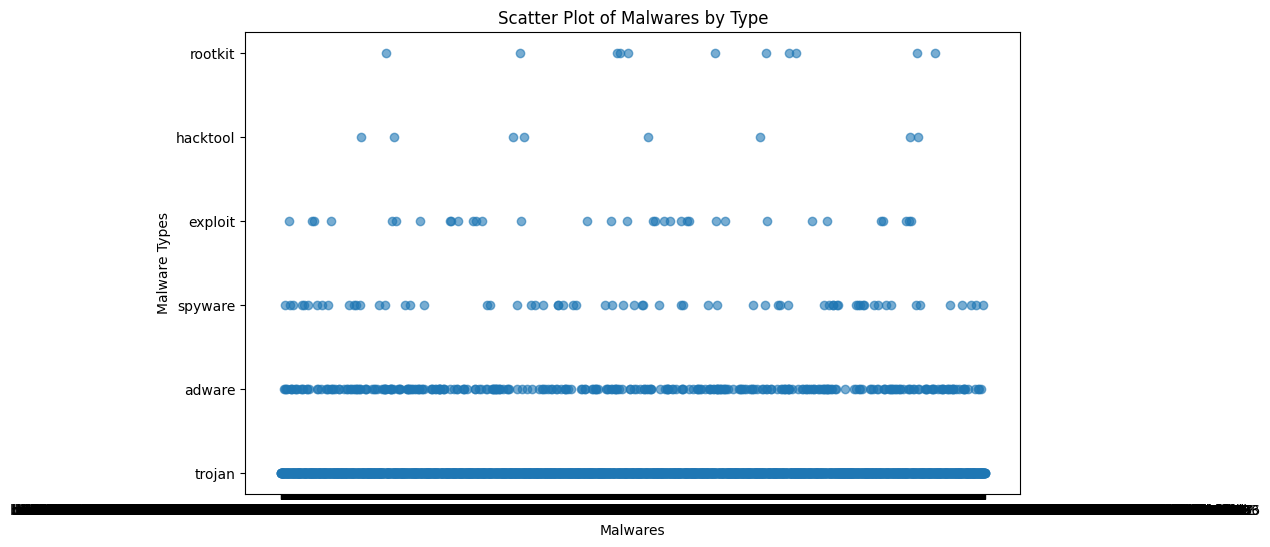

In [8]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['hash'], df['detection'], alpha=0.6)

# Add labels and title
plt.xlabel('Malwares')
plt.ylabel('Malware Types')
plt.title('Scatter Plot of Malwares by Type')

# Show the plot
plt.show()
